## 회귀분석

- y값이 예측, 무한대의 숫자값 1개가 출력되게 끔 예측하는 분석 기법
- wx + b , w1x1 + w0x0 표현방법은 다양
- w는 회귀계수, b는 바이어스(인터셉트 0
- 회귀계수는 y 값에 영향을 미치는 정도 (변수의 중요도)
- 머신러닝, 딥러닝 차이점, 공식을 제공(머신러닝)/ 공식을 안쓴다(딥러닝)
- w,b 값은 구하는 송식이 존재(최소제곱법에 따라서 계산)
- 차이가 적을수록 잘한것
- 데이터 간격의 덧셈이 작을 수록 좋은것
- 회귀분석에서는 똑같이 맞출수가 없기 때문에 실제 값과 근접할수록 잘 맞춘것
- 실제 값 - 예측 값 , 자료의 뭉쳐있는가?를 확인하는 평가 기준도 필요
- 분산평가지표를 사용, 
- y^ + err = y


- 분류분석에서 평가지표는 정밀도와 재현률

### [분산 분석(ANOVA)]

- 분산 분석(ANOVA: Analysis of Variance)은 종속변수의 분산과 독립변수의 분산간의 관계를 사용

In [78]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


x=[20,25,30,34,40];x=np.array(x).reshape(-1,1)
y=[26,30,40,48,66]; y=np.array(y).reshape(-1,1)



model=LinearRegression()
model.fit(x,y)

#print(model.coef_, model.intercept_)
y_preds = model.predict(x)

### --------- 위의 수식으로 R2값을 구해봅니다. --------
print('-- 직접 계산한 R-squared(R^2) 값---')
SSE=np.sum((y-model.predict(x))**2)
print('SSE:%.2f' % SSE)   # rss값은 sse값임. 
TSS=np.sum((y-np.mean(y))**2)
print('TSS:%.2f' % TSS)
print('R2= 1-SSE/TSS: %.3f'% (1-SSE/TSS ))


### ------ 사이킷런에서 제공하는 R2 score값을 출력해봅니다.-----
print( '\n--- 사이킷런제공 R-squared(R^2)값 ----')
# print('회귀계수 %.4f '%model.coef_)
print('r2값 %.3f'%r2_score(y, y_preds))  # 아래의 score와 같은 값임.
print('socre값(결정계수 R값) %.3f' % model.score(x,y))


# r2_score 모듈을 사용하면 되지만 분산 분석에서 여러가지것들을 설명 할 수 있고
# 분산 분석을 하기 위해 모델의 성능읖 평하거나
# 값이 어떻게 구해지는지만 알아두기


-- 직접 계산한 R-squared(R^2) 값---
SSE:43.18
TSS:1016.00
R2= 1-SSE/TSS: 0.958

--- 사이킷런제공 R-squared(R^2)값 ----
r2값 0.958
socre값(결정계수 R값) 0.958


### 고전적인 통계방법론

- 데이터 갯수가 31개 미만인 경우는 T-test를 통해 p-value 값을 확인
- p-value은 구글링 해서 찾아볼것
- 귀무가설, 대립가설
- 귀무가설 = 0가설, 가설이 없음
- 대립가설 = 귀무가설 기각
- 귀무가설 : 상관계수는 0이다(=상관 관계가 없다).
- 대립가설 : 상관계수는 0이 아니다(=상관 관계가 있다).
- 귀무가설 자체가 "상관 계수는 0이며 p-value가 0.05미만일 때에만 상관계수가 의미가 있음.
- 기무가설기각, 대립가설 채택( x 변수를 사용하는 근거)하는 근거 p-value값을 봄


In [9]:
!pip install statsmodels

In [11]:
import statsmodels.api as sm

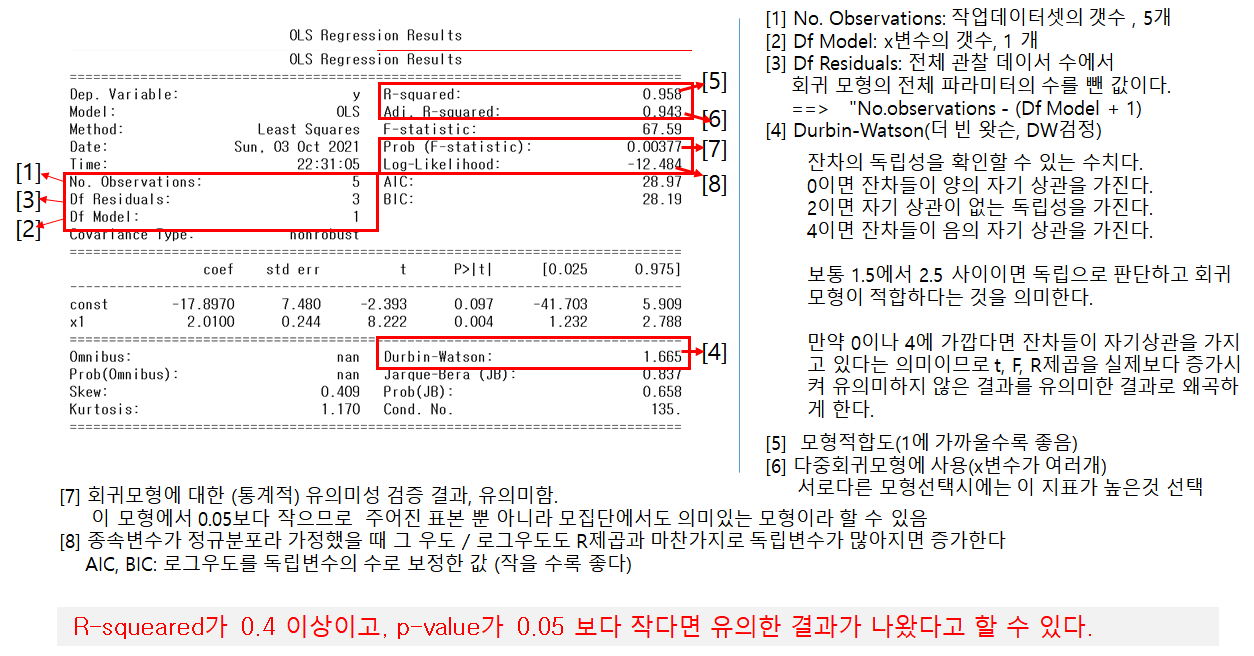

In [13]:
x1=[20,25,30,34,40];x=np.array(x).reshape(-1,1)
y1=[26,30,40,48,66]; y=np.array(y).reshape(-1,1)

model_sm1 = sm.OLS(y1, x1)    #  y,x 를 y~x로 표현가능, y~x1+x2+x3도 가능
# 설명력을 왕창 가지고 있는 모듈, 한가지 특이점, intercept 를 제공하지 않음(원래 그럼)
# y값에 얼마나 x 변수가 충실한가

result1= model_sm1.fit()
print(result1.summary())
print('가중치 벡터값',result1.params)   # coef_값만 나옴, 여기서는 b값이 포함안됨

print('\n---예측값--------')
result1.predict([3]) # 3 에 대한 y_예측값


# p-value값을 먼저 보는것을 추천
# 데이터 셋을 봐야 하며, 

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              309.3
Date:                Mon, 04 Jul 2022   Prob (F-statistic):                    6.14e-05
Time:                        13:53:19   Log-Likelihood:                         -15.153
No. Observations:                   5   AIC:                                      32.31
Df Residuals:                       4   BIC:                                      31.92
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\HP\miniconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


array([4.32087161])

C:\Users\HP\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


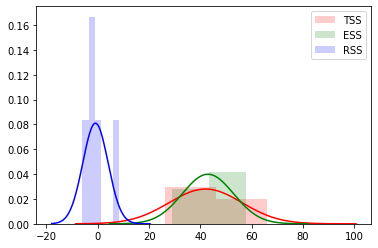

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


sns.distplot(y1,
             kde=False, fit=stats.norm, hist_kws={"color": "r", "alpha": 0.2}, fit_kws={"color": "r"},
             label="TSS")
sns.distplot(result1.fittedvalues,
             kde=False, hist_kws={"color": "g", "alpha": 0.2}, fit=stats.norm, fit_kws={"color": "g"},
             label="ESS")
sns.distplot(result1.resid,
             kde=False, hist_kws={"color": "b", "alpha": 0.2}, fit=stats.norm, fit_kws={"color": "b"},
             label="RSS")
plt.legend()
plt.show()

In [15]:
#상수항 추가 하면 w(x1)와 b(const)값을 모두 확인할수 있다.
x2=[20,25,30,34,40];x=np.array(x).reshape(-1,1)
y2=[26,30,40,48,66]; y=np.array(y).reshape(-1,1)

x2=sm.add_constant(x2)
print(x2)

# 상수항 추가는 바이어스를 만들어 내기 위해 현재 하고 있는 sm  모듈에서 사용하는 대표적인 방법

[[ 1. 20.]
 [ 1. 25.]
 [ 1. 30.]
 [ 1. 34.]
 [ 1. 40.]]


In [16]:
model_sm2 = sm.OLS(y2, x2)  # sm.OLS('y2 ~ 0 + x2') 로도 상수항 추가가능
result2 = model_sm2.fit()
print(result2.summary())

### print(''''사이킷런 회귀분석 패키지 제공 w와 b값)
print('----from sklearn.linear_model import LinearRegression -')
print(model.coef_)        # model_sm의 x1의 coef
print(model.intercept_)   # model_sm의 const의 coef


## --- sm 패키지에서의 w,값 출력
print(result2.params)   # sm패키지에서 w,b값 출력

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     67.59
Date:                Mon, 04 Jul 2022   Prob (F-statistic):            0.00377
Time:                        13:58:16   Log-Likelihood:                -12.484
No. Observations:                   5   AIC:                             28.97
Df Residuals:                       3   BIC:                             28.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.8970      7.480     -2.393      0.0

C:\Users\HP\miniconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [17]:
import numpy as np


In [18]:
# 분산 분석(ANOVA: Analysis of Variance)
# TSS:  종속변수값의 움직임의 범위를 나타낸다.
# ESS(explained sum of squares): y예측값의 분산(모형의 예측값의 움직임의 범위)
# RSS(residual sum of squares): y값과 y예측값의차이(잔차 e)의 분산(오차의 크기)

## 상수항을 추가하여서  sklearn.linear_model 의 TSS, R^2 등 분산지표와 값 같음
print("TSS = ", result2.uncentered_tss)
print("ESS = ", result2.mse_model)
print("RSS = ", result2.ssr)
print("ESS + RSS = ", result2.mse_model + result2.ssr)
print("R squared = ", result2.rsquared)

TSS =  9836
ESS =  972.8239202657808
RSS =  43.17607973421925
ESS + RSS =  1016.0
R squared =  0.9575038585293117


In [19]:
# 잔차벡터 e(error)도 구해봅니다.
print('----------- sm 패키지의 잔차값')
error2=result2.resid
print(error2)

### 직접구해보는 잔차값
print('\n\n----------- 직접구해보는 잔차값---------------')
print('----y')
print(y)

print('\n ----y_pred (예측값,  wx+b)')
print(result2.fittedvalues)    # result.fittedvalues


print('\n---error (실제y값과 y예측값의 차이)')    # result.resid(잔차벡터값임.)
mycalcError=y.reshape(-1)-result2.predict(x2)
print(mycalcError)

----------- sm 패키지의 잔차값
[ 3.69767442 -2.35215947 -2.40199336 -2.44186047  3.49833887]


----------- 직접구해보는 잔차값---------------
----y
[[26]
 [30]
 [40]
 [48]
 [66]]

 ----y_pred (예측값,  wx+b)
[22.30232558 32.35215947 42.40199336 50.44186047 62.50166113]

---error (실제y값과 y예측값의 차이)
[ 3.69767442 -2.35215947 -2.40199336 -2.44186047  3.49833887]


In [20]:
# 잔차의 합은 최대한 0에 가깝게 구하여져 있음.
error_sum2=result2.resid.sum()
print(error_sum2)


print('\n\n----직접계산한 값 ')
print(np.sum(mycalcError)) 

-4.618527782440651e-14


----직접계산한 값 
-4.618527782440651e-14


In [21]:
# 출처: https://mindscale.kr/course/basic-stat-python/14/
# csrs 자료로 작업하여 봅니다.
import pandas as pd
from statsmodels.formula.api import ols

data=[ [4,2],[4,10],[7,4],[7,22],[8,16],[9,10],[10,18],[10,26],[10,34],[11,17],[11,28],
[12,14],[12,20],[12,24],[12,28],[13,26],[13,34],[13,34],[13,46],[14,26],[14,36],[14,60],[14,80],
[15,20],[15,26],[15,54],[16,32],[16,40],[17,32],[17,40],[17,50],[18,42],[18,56],[18,76],[18,84],
[19,36],[19,46],[19,68],[20,32],[20,48],[20,52],[20,56],[20,64],[22,66],[23,54],[24,70],[24,92],
[24,93],[24,120],[25,85]]
data=np.array(data)

df = pd.DataFrame({'speed':data[:,0],'dist':data[:,1]})
df.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


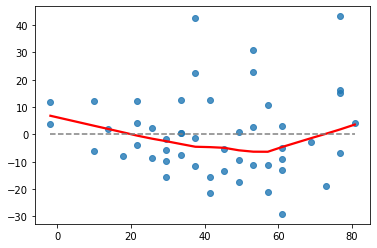

In [22]:
res = ols('dist ~ speed', data=df).fit()   # y,x 를 y~x로 표현가능, y~x1+x2+x3도 가능

#################################### 
# 모형의 선형성
####################################
# 예측값(fitted)과 잔차(residual)의 비교
# 모든 예측값에서 잔차가 비슷하게 있어야 함(가운데 점선)
# 빨간 실선은 잔차의 추세를 나타냄
# 빨간 실선이 점선에서 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것

import matplotlib.pyplot as plt
import seaborn as sns

fitted = res.predict(df)   
residual = df['dist'] - fitted

sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

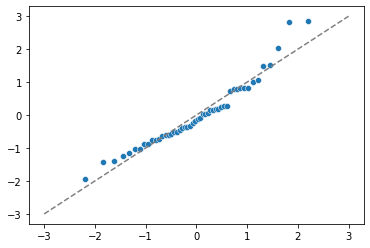

ShapiroResult(statistic=0.9450905919075012, pvalue=0.02152460627257824)


In [23]:
#################################### 
# 잔차의 정규성
####################################
# 잔차가 정규분포를 따른다는 가정
# Q-Q 플롯으로 확인할 수 있음
# 잔차가 정규분포를 띄면 Q-Q 플롯에서 점들이 점선을 따라 배치되어 있어야 함
import scipy.stats
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
plt.show()


# p값이 0.02로  p<0.05 에 해당함으로 귀무가설을 기각한다.
# ==> 잔차의 정규성에서 귀무가설 기각은 잔차의 등분산성과 정규성을 가정할 수 없음을 의미한다.
# 즉 아래 값중 일부분의 값이 회귀선을 많이 벗어나서 예측값과의 차이인 잔차의 분포가 일정치 않음

print(scipy.stats.shapiro(residual))

C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

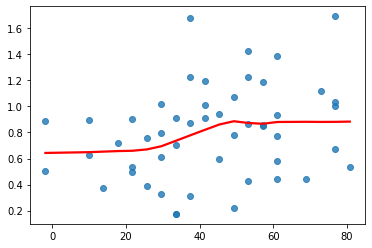

In [24]:
#################################### 
# 잔차의 등분산성
####################################
# 회귀모형을 통햬 예측된 값이 크던 작던, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
# 아래 그래프는 예측값(가로축)에 따라 잔차가 어떻게 달라지는지 보여줌
# 빨간색 실선이 수평선을 그리는 것이 이상적

import numpy as np
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

In [25]:
############################
## 극단값
##########################

from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(res).cooks_distance
cd.sort_values(ascending=False).head()

# 48번, 22번, 38번 자료가 특히 예측에서 많이 벗어남을 알 수 있음
# 아웃라이너 찾아보고, 아래 값들 제거해서 다시 선형회귀 해봄

48    0.340396
22    0.085552
38    0.068053
44    0.053176
34    0.052576
dtype: float64

In [7]:
x = [20,25,30,34,40];x=np.array(x).reshape(-1,1)

x=[[20,2],[25,25],[30,30]]
y = [0.3,0.7,0.2]

model.fit(x,y)
model.coef_, model.intercept_


20*(-0.15)+2*0.05+3.1999999999999997
25*(-0.15)+25*0.05+3.1999999999999997
# 컨피던스 값이 변수의 중요도

# w = [[2.00996678]]
# b = [-17.89700997]

# x*w +b , model.predict(x)



(array([-0.15,  0.05]), 3.1999999999999997)

### 강의 07 현대 자동차 가격 예측 모델 학습
- https://wikidocs.net/39301

In [27]:
!pip install openpyxl

In [34]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression

##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='test')

##########데이터 분석

##########데이터 전처리

x_train_df = train_df.drop(['가격'], axis=1)
x_test_df = test_df.drop(['가격'], axis=1)
y_train_df = train_df['가격']
y_test_df = test_df['가격']

print(x_train_df.head())


     년식   종류    연비   마력    토크   연료  하이브리드   배기량    중량 변속기
0  2015  준중형  11.8  172  21.0  가솔린      0  1999  1300  자동
1  2015  준중형  12.3  204  27.0  가솔린      0  1591  1300  자동
2  2015   소형  15.0  100  13.6  가솔린      0  1368  1035  수동
3  2014   소형  14.0  140  17.0  가솔린      0  1591  1090  자동
4  2015   대형   9.6  175  46.0   디젤      0  2497  1990  자동


In [35]:
x_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년식      71 non-null     int64  
 1   종류      71 non-null     object 
 2   연비      71 non-null     float64
 3   마력      71 non-null     int64  
 4   토크      71 non-null     float64
 5   연료      71 non-null     object 
 6   하이브리드   71 non-null     int64  
 7   배기량     71 non-null     int64  
 8   중량      71 non-null     int64  
 9   변속기     71 non-null     object 
dtypes: float64(2), int64(5), object(3)
memory usage: 5.7+ KB


In [39]:
objList =['종류','연료','변속기']

for x in objList:
    print(x_train_df[x].unique())
    print(x_test_df[x].unique())
    print('-'*50)
    
# 데이터 셋에서 순서와 상관 없이 확인해봐야함
# 데이터 카운트 값으로 편향 여부를 확인해줘야함

['준중형' '소형' '대형' '중형']
['대형' '소형' '중형' '준중형']
--------------------------------------------------
['가솔린' '디젤' 'LPG']
['LPG' '가솔린' '디젤']
--------------------------------------------------
['자동' '수동']
['수동' '자동']
--------------------------------------------------


In [46]:
train_df.dtypes

가격         int64
년식         int64
종류        object
연비       float64
마력         int64
토크       float64
연료        object
하이브리드      int64
배기량        int64
중량         int64
변속기       object
dtype: object

In [47]:
objlist=[]
for x in train_df:
    if x.dtypes == 'object':
        objlist.qppned(x)

AttributeError: 'str' object has no attribute 'dtypes'

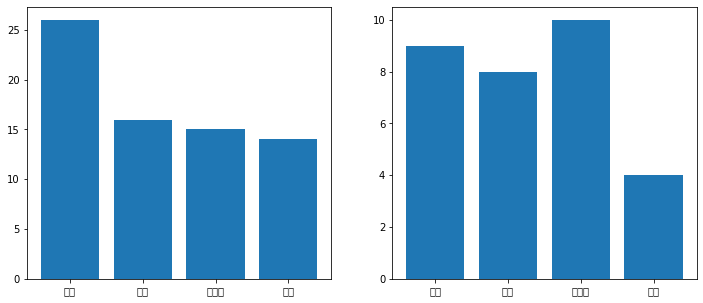

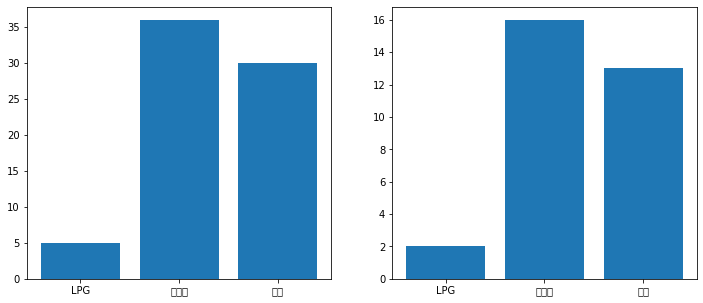

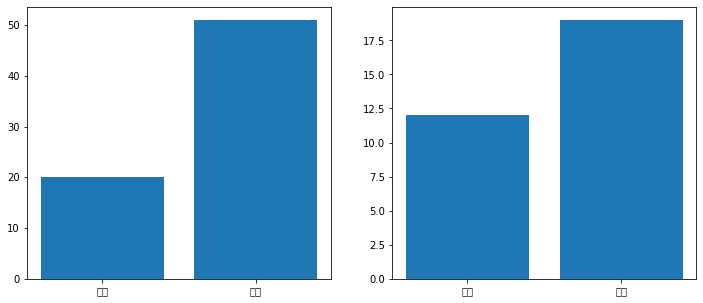

In [44]:
# 데이터의 편향 여부도 확인해줘야 한다.


import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


objList =['종류','연료','변속기']

for x in objList:
    train_tmp = np.unique(x_train_df[x], return_counts=True)
    test_tmp = np.unique(x_test_df[x], return_counts=True)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.bar(train_tmp[0], train_tmp[1])
    plt.subplot(1,2,2)
    plt.bar(test_tmp[0], test_tmp[1])
    
    
#트레이닝 데이터, 테스트 데이터 비슷하게 나오는지 확인

In [45]:
# 더미 변수 + 스케일링이 섞임

transformer = make_column_transformer(
    (OneHotEncoder(), ['종류', '연료', '변속기']),
    remainder='passthrough')
transformer.fit(x_train_df) # x_train_df로만 fit 시킨다.

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['종류', '연료', '변속기'])])

In [57]:
x_train = transformer.transform(x_train_df) #트랜스포머의 transform() 함수는 결과를 넘파이 배열로 리턴
x_test = transformer.transform(x_test_df)

y_train = y_train_df.to_numpy()
y_test = y_test_df.to_numpy()


len(x_train_df.loc[0]), len(x_train[0]) # 10개 , 16개



(10, 16)

In [66]:
x_train[:3]

array([[0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.015e+03, 1.180e+01, 1.720e+02,
        2.100e+01, 0.000e+00, 1.999e+03, 1.300e+03],
       [0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.015e+03, 1.230e+01, 2.040e+02,
        2.700e+01, 0.000e+00, 1.591e+03, 1.300e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.015e+03, 1.500e+01, 1.000e+02,
        1.360e+01, 0.000e+00, 1.368e+03, 1.035e+03]])

In [70]:
x_train_df

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...
66,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
67,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
68,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
69,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동


In [65]:
# OneHotEncoder, make_column_transformer의 다양한 기능들 확인 가능
transformer.feature_names_in_

transformer.get_feature_names_out, transformer.fit_transform

transformer.fit_transform

<bound method ColumnTransformer.fit_transform of ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['종류', '연료', '변속기'])])>

In [77]:
y_train = y_train_df.to_numpy()
y_test = y_test_df.to_numpy()

##########모델 생성

model = LinearRegression()

##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

print(model.score(x_test, y_test)) #0.7739730315245023 R^2(R제곱)



print(model.coef_, model.intercept_)

y_preds = model.predict(x)

0.7739730315244991
[-5.38075734e+02  4.63861493e+02  1.09448916e+01  6.32693495e+01
  2.88561213e+02 -2.12798304e+02 -7.57629085e+01 -1.61291478e+02
  1.61291478e+02  3.51067713e+01  1.31195679e+02  9.83907200e+00
 -7.84075777e+00  3.25680700e+02  1.78940523e+00  1.28445954e-01] -75292.55857240506


ValueError: Expected 2D array, got scalar array instead:
array=가격.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [73]:
from sklearn.metrics import r2_score


r2_score(y_test, model.predict(x_test)) # 위에 값과 같음

0.7739730315244991

In [75]:
import statsmodels.api as sm

x2 = sm.add_constant(x_test)
model_sm1 = sm.OLS(y_test, x2)    #  y,x 를 y~x로 표현가능, y~x1+x2+x3도 가능
result1= model_sm1.fit()
print(result1.summary())
print('가중치 벡터값',result1.params)   # coef_값만 나옴, 여기서는 b값이 포함안됨


# 자료를 보면 상수항을 추가해서 x 변수 의존도를 낮춰야 한다.
# 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     15.28
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           4.81e-07
Time:                        15:05:53   Log-Likelihood:                -248.99
No. Observations:                  31   AIC:                             524.0
Df Residuals:                      18   BIC:                             542.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.399e+05   2.33e+05      0.601      0.5

In [29]:
print(x_train.columns) #Index(['년식', '종류', '연비', '마력', '토크', '연료', '하이브리드', '배기량', '중량', '변속기'], dtype='object')

transformer = make_column_transformer(
    (OneHotEncoder(), ['종류', '연료', '변속기']),
    remainder='passthrough')
transformer.fit(x_train)
x_train = transformer.transform(x_train) 
x_test = transformer.transform(x_test)

Index(['년식', '종류', '연비', '마력', '토크', '연료', '하이브리드', '배기량', '중량', '변속기'], dtype='object')


In [30]:
##########모델 생성

model = LinearRegression()

##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

print(model.score(x_test, y_test)) #0.7739730315245023

##########모델 예측

x_test = [
    [2016, '대형', 6.8, 159, 25, 'LPG', 0, 2359, 1935, '수동']
]
x_test = pd.DataFrame(x_test, columns=['년식', '종류', '연비', '마력', '토크', '연료', '하이브리드', '배기량', '중량', '변속기'])
x_test = transformer.transform(x_test)

y_predict = model.predict(x_test)

print(y_predict[0]) #1802.160302088625




0.7739730315244991
1802.1603020886396
